#Lectura y procesamiento de los resultados de los mejores modelos GRU

En el presente archivo se leen los archivos excel que contienen resumenes de los modelos generados con las grillas de GRU. Se procesa dicha información para encontrar los mejores modelos.

In [1]:
# Access files from your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd gdrive/MyDrive/Universidad/2020/Tesis_final/Codigos/leer_procesar_modelos_NARMAX/gru/

/content/gdrive/MyDrive/Universidad/2020/Tesis_final/Codigos/leer_procesar_modelos_NARMAX/gru


In [4]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model

summaryModelsGRU2S = pd.read_excel('grilla_GRU_NARMAX_2STEPS.xlsx', header=0)
summaryModelsGRU4S = pd.read_excel('grilla_GRU_NARMAX_4STEPS.xlsx', header=0)
summaryModelsGRU8S = pd.read_excel('grilla_GRU_NARMAX_8STEPS.xlsx', header=0)
summaryModelsGRU16S = pd.read_excel('grilla_GRU_NARMAX_16STEPS.xlsx', header=0)
summaryModelsGRUMC = pd.read_excel('grilla_GRU_NARMAX_2STEPS_MultiCapas.xlsx', header=0)

grilla_GRU_NARMAX_AQP = pd.concat([summaryModelsGRU2S, summaryModelsGRU4S], ignore_index=True)
grilla_GRU_NARMAX_AQP = pd.concat([grilla_GRU_NARMAX_AQP, summaryModelsGRU8S], ignore_index=True)
grilla_GRU_NARMAX_AQP = pd.concat([grilla_GRU_NARMAX_AQP, summaryModelsGRU16S], ignore_index=True)

grilla_GRU_NARMAX_AQP_MC = pd.concat([grilla_GRU_NARMAX_AQP, summaryModelsGRUMC], ignore_index=True)

grilla_GRU_NARMAX_AQP_MC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MAE                     764 non-null    float64
 1   delayedSteps            764 non-null    int64  
 2   nameModel               764 non-null    object 
 3   nameHistory             764 non-null    object 
 4   nameConfiguration       764 non-null    object 
 5   timeTrain (in seconds)  764 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 35.9+ KB


##La cantidad de modelos generados para el GRU NARMAX de AQP fue de 764

In [5]:
rslt_df = grilla_GRU_NARMAX_AQP_MC.sort_values('MAE')
total = grilla_GRU_NARMAX_AQP_MC['timeTrain (in seconds)'].sum()
print("Tiempo total: " + str(total))
grilla_GRU_NARMAX_AQP_MC.describe()

Tiempo total: 261829.02000000002


MAE  delayedSteps  timeTrain (in seconds)
count  764.000000    764.000000              764.000000
mean     0.325176      5.256545              342.708141
std      0.040644      4.478830              282.407161
min      0.279432      2.000000               62.040000
25%      0.304939      2.000000              186.577500
50%      0.316639      4.000000              251.245000
75%      0.327835      8.000000              376.390000
max      0.485316     16.000000             3034.560000

##La cantidad de segundos totales para ejecutar la grilla es aproximadamente 261829, lo que equivale a 72 horas aproximadamente. Además se tienen las estadisticas resumen.

In [6]:
rslt_df.iloc[:50,:]

MAE  ...  timeTrain (in seconds)
327  0.279432  ...                  322.52
303  0.279749  ...                  271.55
351  0.280708  ...                  540.42
309  0.280805  ...                  246.55
315  0.280828  ...                  316.53
357  0.281437  ...                  561.22
375  0.281935  ...                 1311.02
325  0.282500  ...                  308.05
363  0.283396  ...                 1303.78
381  0.283690  ...                 1311.25
373  0.283821  ...                 1315.33
349  0.283868  ...                  565.02
291  0.283998  ...                  272.83
377  0.284343  ...                 1442.53
297  0.285130  ...                  259.73
301  0.285240  ...                  265.48
333  0.285287  ...                  309.76
345  0.285711  ...                  642.06
339  0.286219  ...                  558.27
353  0.286989  ...                  527.05
233  0.287598  ...                  209.72
255  0.288104  ...                  380.19
331  0.288258  ...                  297.22
305  0.288414  ...                  254.96
329  0.288450  ...                  313.46
321  0.288536  ...                  294.56
207  0.288597  ...                  191.01
231  0.288792  ...                  225.77
335  0.289008  ...                  297.28
209  0.289732  ...                  186.00
253  0.290238  ...                  367.35
359  0.290447  ...                  543.01
257  0.290506  ...                  372.18
279  0.290691  ...                  869.35
285  0.290876  ...                  852.71
219  0.290978  ...                  224.11
281  0.291008  ...                  885.76
237  0.291390  ...                  209.33
383  0.291669  ...                 1367.27
307  0.292179  ...                  242.04
328  0.292418  ...                  310.95
283  0.292614  ...                  909.41
195  0.292646  ...                  203.30
213  0.292850  ...                  177.79
287  0.292958  ...                  853.49
273  0.293627  ...                  801.79
280  0.293898  ...                  855.05
311  0.294210  ...                  247.72
361  0.294215  ...                 1267.26
334  0.294551  ...                  296.73

[50 rows x 6 columns]

In [7]:
rslt_df.iloc[0,:]

MAE                                                                0.279432
delayedSteps                                                             16
nameModel                 results/GRU_1647_1_64_sigmoid_sigmoid_sigmoid_...
nameHistory               results/GRU_1647_1_64_sigmoid_sigmoid_sigmoid_...
nameConfiguration         results/GRU_1647_1_64_sigmoid_sigmoid_sigmoid_...
timeTrain (in seconds)                                               322.52
Name: 327, dtype: object

In [8]:
bestModel = rslt_df.iloc[0,:]
print(bestModel)

MAE                                                                0.279432
delayedSteps                                                             16
nameModel                 results/GRU_1647_1_64_sigmoid_sigmoid_sigmoid_...
nameHistory               results/GRU_1647_1_64_sigmoid_sigmoid_sigmoid_...
nameConfiguration         results/GRU_1647_1_64_sigmoid_sigmoid_sigmoid_...
timeTrain (in seconds)                                               322.52
Name: 327, dtype: object


In [9]:
print(bestModel['nameHistory'])
print(bestModel['nameConfiguration'])
print(bestModel['nameModel'])

results/GRU_1647_1_64_sigmoid_sigmoid_sigmoid_mean_absolute_error_16S_history.npy
results/GRU_1647_1_64_sigmoid_sigmoid_sigmoid_mean_absolute_error_16S_config.npy
results/GRU_1647_1_64_sigmoid_sigmoid_sigmoid_mean_absolute_error_16S.h5


In [10]:
#para recuperar history
history=np.load('GRU_1647_1_64_sigmoid_sigmoid_sigmoid_mean_absolute_error_16S_history.npy',allow_pickle='TRUE').item()
print(history)

#para recuperar configDict
config=np.load('GRU_1647_1_64_sigmoid_sigmoid_sigmoid_mean_absolute_error_16S_config.npy',allow_pickle='TRUE').item()
print(config)

# para recuperar el modelo
saved_model = load_model('GRU_1647_1_64_sigmoid_sigmoid_sigmoid_mean_absolute_error_16S.h5')
print(saved_model.summary())
print(saved_model.layers[2].get_config())

{'loss': [0.27960410714149475, 0.274429589509964, 0.2702087163925171, 0.26642438769340515, 0.2630763053894043, 0.25864580273628235, 0.2548860013484955, 0.25143152475357056, 0.24765685200691223, 0.2442529946565628, 0.2420744001865387, 0.23868003487586975, 0.23674799501895905, 0.2343549281358719, 0.2320496141910553, 0.23031668365001678, 0.2289990335702896, 0.22678400576114655, 0.22482092678546906, 0.2233278900384903, 0.22203294932842255, 0.22096122801303864, 0.21893644332885742, 0.21791864931583405, 0.21707312762737274, 0.21481631696224213, 0.21395637094974518, 0.21307237446308136, 0.21173162758350372, 0.2102031111717224, 0.20924757421016693, 0.20802761614322662, 0.20723481476306915, 0.20615223050117493, 0.205063134431839, 0.20349560678005219, 0.20297564566135406, 0.20288541913032532, 0.2005903422832489, 0.1997763216495514, 0.1983407884836197, 0.19783277809619904, 0.1975926160812378, 0.196054607629776, 0.19535943865776062, 0.19439129531383514, 0.1945817917585373, 0.19283556938171387, 0.1

In [11]:
def cargarData1():
  trainDFScaled = pd.read_csv('data/dataTrainNarmaxScaledGRU.csv', header=0)
  testDFScaled = pd.read_csv('data/dataTestNarmaxScaledGRU.csv', header=0)
  trainDF = pd.read_csv('data/dataTrainNarmaxGRU.csv', header=0)
  testDF = pd.read_csv('data/dataTestNarmaxGRU.csv', header=0)
  return trainDFScaled, testDFScaled, trainDF, testDF


def generateSupervisedData(data, delays, predictionHorizon, columnTarget = 45):
  cont = 0
  X = list()
  y = list()

  #Se va a iterar para cada fragmento de datos
  values = data.values
  chunk_ids = np.unique(values[:, 0])
  for chunk_id in chunk_ids:
    rows = data.loc[(data['chunkID'] == chunk_id)]
    #print(rows)
    cantidadFilas = rows.shape[0]
    indexAux = 0
    indexTarget = 0
    for _, row in rows.iterrows():
      end_row = indexAux + delays
      indexTarget = end_row - 1 + predictionHorizon
      if indexTarget <= cantidadFilas-1:
        salidaAux = rows.iloc[indexTarget, columnTarget]
        xAux = rows.iloc[indexAux:end_row, :].values
        #print(xAux.shape)
        #print(xAux)
        X.append(xAux)
        y.append(salidaAux)
        #print(salidaAux)
      indexAux = indexAux + 1
    cont = cont + 1
  X = np.array(X)
  y = np.array(y)
  return X, y

def generateFinalData(delays, predictionHorizon, trainDFScaled, testDFScaled, trainDF, testDF):
  trainXScaled, trainYScaled = generateSupervisedData(trainDFScaled, delays, predictionHorizon)
  testXScaled, testYScaled = generateSupervisedData(testDFScaled, delays, predictionHorizon)
  trainX, trainY = generateSupervisedData(trainDF, delays, predictionHorizon)
  testX, testY = generateSupervisedData(testDF, delays, predictionHorizon)
  #print("trainXScaled.shape: ", str(trainXScaled.shape))
  #print("trainYScaled.shape: ", str(trainYScaled.shape))
  #print("testXScaled.shape: ", str(testXScaled.shape))
  #print("testYScaled.shape: ", str(testYScaled.shape))
  #print("trainX.shape: ", str(trainX.shape))
  #print("trainY.shape: ", str(trainY.shape))
  #print("testX.shape: ", str(testX.shape))
  #print("testY.shape: ", str(testY.shape))
  return trainXScaled, trainY, testXScaled, testY

def plotErrors(historyModel):
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
  fig.suptitle('Errors')
  ax1.plot(historyModel['mean_squared_error'], label='mse')
  ax1.plot(historyModel['val_mean_squared_error'], label='val_mse')
  ax1.legend()

  ax2.plot(historyModel['root_mean_squared_error'], label='rmse')
  ax2.plot(historyModel['val_root_mean_squared_error'], label='val_rmse')
  ax2.legend()

  ax3.plot(historyModel['mean_absolute_error'], label='mae')
  ax3.plot(historyModel['val_mean_absolute_error'], label='val_mae')
  ax3.legend()

  ax4.plot(historyModel['mean_absolute_percentage_error'], label='mape')
  ax4.plot(historyModel['val_mean_absolute_percentage_error'], label='val_mape')
  ax4.legend()

def plotLoss(historyModel):
  fig, ax = plt.subplots(1, 1)
  ax.plot(historyModel['loss'], label='loss')
  ax.plot(historyModel['val_loss'], label='val_loss')
  ax.legend()

def reshapeXdata(trainXScaled, testXScaled):
  #reshape data
  trainXScaled = trainXScaled.reshape((trainXScaled.shape[0],trainXScaled.shape[1]*trainXScaled.shape[2]))
  #print("trainXScaled.shape: ", str(trainXScaled.shape))
  testXScaled = testXScaled.reshape((testXScaled.shape[0],testXScaled.shape[1]*testXScaled.shape[2]))
  #print("testXScaled.shape: ", str(testXScaled.shape))
  return trainXScaled, testXScaled

# calculate the error between an actual and predicted value
def calculate_error(actual, predicted):
	# calculate abs difference
	return abs(actual - predicted)

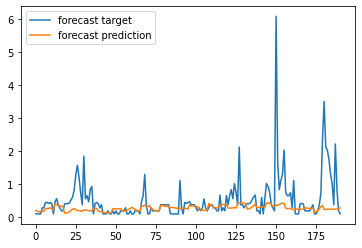

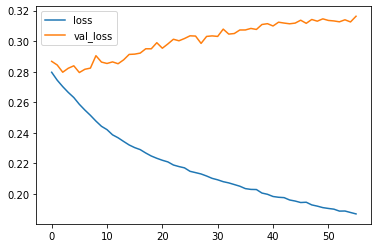

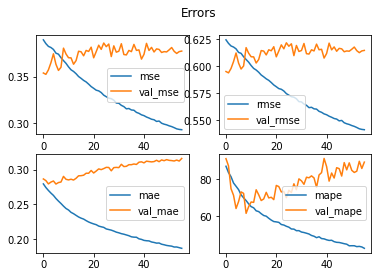

In [12]:
trainDFScaled, testDFScaled, trainDF, testDF = cargarData1()
trainXScaled, trainY, testXScaled, testY = generateFinalData(bestModel['delayedSteps'], 24, trainDFScaled, testDFScaled, trainDF, testDF)
#trainXScaled, testXScaled = reshapeXdata(trainXScaled, testXScaled)
validation_target = testY[:191]
validation_predictions = saved_model.predict(testXScaled[:191,:])
fig, ax = plt.subplots(1, 1)
ax.plot(validation_target, label='forecast target')
ax.plot(validation_predictions, label='forecast prediction')
ax.legend()

plotLoss(history)
plotErrors(history)